In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("compressed_data.csv")
df.head()

/var/folders/r0/sb4d3fwj31s7b6q2gbfpdt_00000gn/T/ipykernel_47509/1256669767.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("compressed_data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [11]:
# Checking the Missing Values
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

# Handling Missing Values
This code ensures that the 'last review' column is properly formatted as datetime, missing value in key columns are appropiatley handled, and incomplete records are removed, preparing the dataset for further analysis and visualization.

In [14]:
# Convert 'Last review' to datatime and handle errors
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')

# Filling Missing values
df.fillna({'reviews per month' : 0, 'last review' : df['last review'].min()}, inplace = True)

# Drop records with missing 'name' or 'host name'
df.dropna(subset = ['NAME', 'host name'], inplace = True)

In [16]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

# Correct Data Types
Ensure that all columns have the correct datatype.

In [80]:
# Remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex = True.astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '',regex = True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/r0/sb4d3fwj31s7b6q2gbfpdt_00000gn/T/ipykernel_47509/2105597371.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex = True.astype(float)


SyntaxError: '(' was never closed (2105597371.py, line 2)

In [22]:
# Removing Duplicate Values
df.drop_duplicates(inplace = True)


In [24]:
# Confirm data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [30]:
df = df.drop(columns = ['license', 'house_rules'], errors = 'ignore')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [32]:
# Descriptive Statistics
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


# Visualization

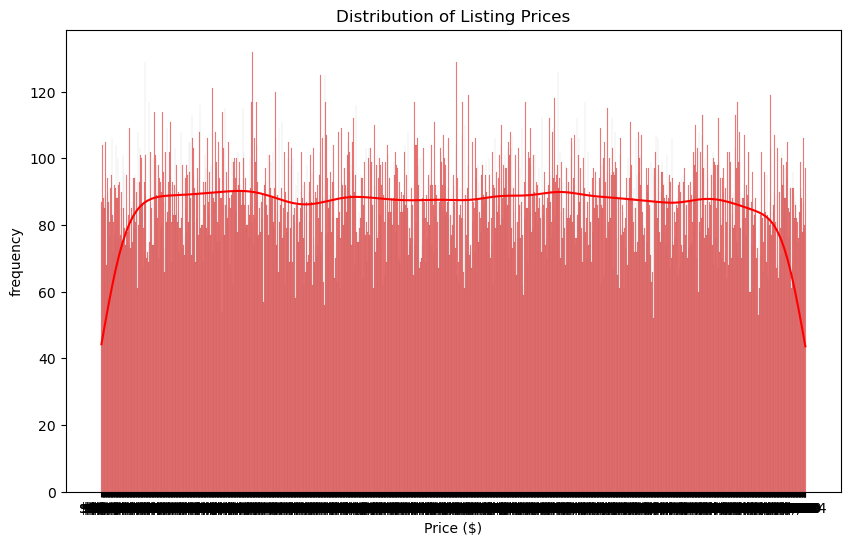

In [37]:
# Distribution of listing prices

plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins = 50, kde = True, color = 'red')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('frequency')
plt.show()

##### The Histogram shows a fairly even distribution of listing prices across different price ranges, indication no particular concentration of listings in any specific price range.

##### The KDE line helps visualize this even spread more clearly, confirming that the  dataset contains listing with a wide variety of prices.

# Room type Analysis

##### Analyze the distribution of different room types.

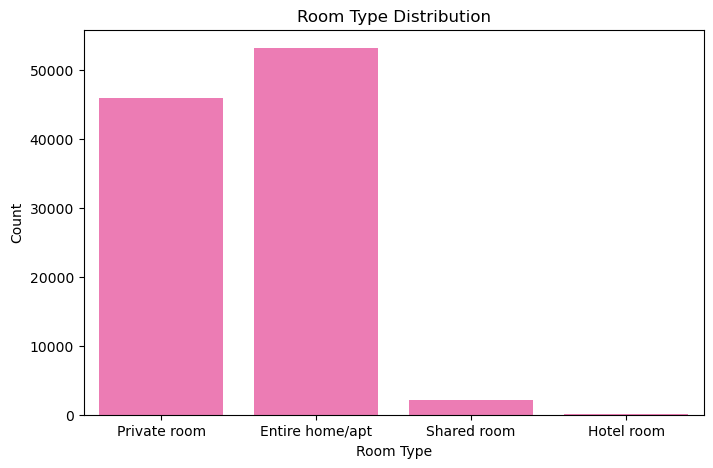

In [45]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'room type', data = df, color = 'hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

##### The count plot shows a clear distribution of the different room types available in the Aisbnb dataset. The Majority of listings are for 'Entire home/apt' and 'Private room', with 'Shared room' and 'Hotel room' being much less common. 

##### This insight can be useful for understanding the availability and popularity of different types of accomodations on Aisbnb.

# Neighborhood Analysis

##### Examine how listings are distributed across different neighborhoods.

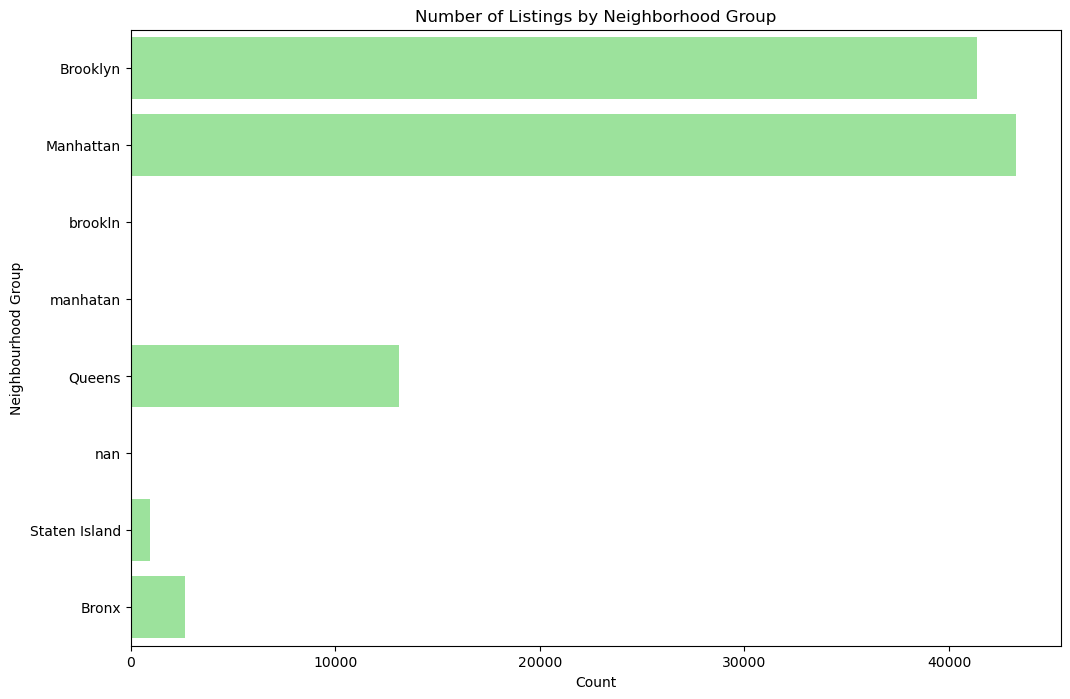

In [51]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'neighbourhood group', data = df, color = 'lightgreen', order = df['neighbourhood group'])
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()

##### The count plot shows a clear distribution of the number of listings across different neighborhood groups. Manhattan and Broohlyn dominate the listings, suggesting they are prime locations for Airbnb. Queens, Bronx, and Staten Island have fewer listings, indicating less availability or popularity.

# Price VS Room Type

##### Visulaize the relationship bewteen price and room type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


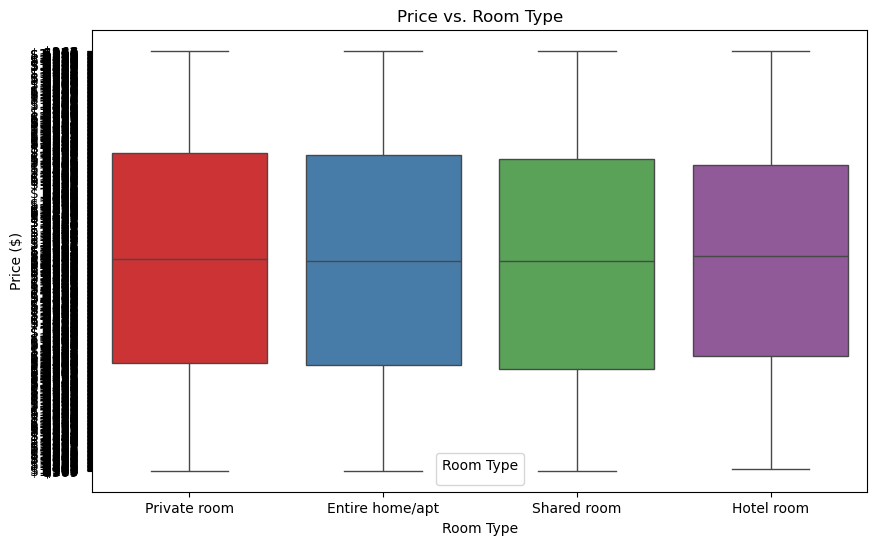

In [56]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'room type', y = 'price', hue = 'room type', data = df, palette = 'Set1')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(title = 'Room Type')
plt.show()

#### Price Vs. Room Type
##### The box plot provides a detailed viewof how prices vary across different room types in the Airbnb dataset. It shows that while 'Shared room' tends to have lower prices, 'Private room', 'Entire home/apt', and 'Hotel room' have higher and more varied price ranges.

##### This visualization helps in understanding the pricing dynamics for different types of accommodations on Airbnb.

In [59]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


# Reviews Over Time

##### Plot the number of reviews over time

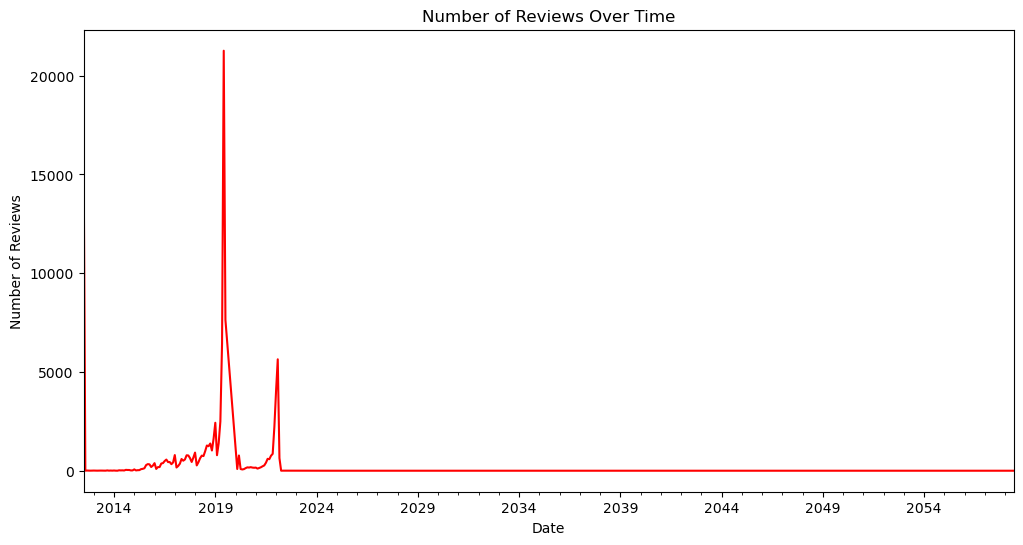

In [67]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize = (12,6))
reviews_over_time.plot(kind = 'line', color = 'red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

##### The line plot provides a clear visualization of the number of reviews over time.
##### It helps to identify trends and patterns in review activity, such as periods of high or low activity.
